<a href="https://colab.research.google.com/github/PriyankaAdimulam12/Python_Intro/blob/main/K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [238]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [239]:
# We don't know the no. of clusters. So let's use K-Means and elbow method to choose this number of optimal clusters.
#Before that we need to normalise or standardize our data..

In [240]:
def norm_func(i):
  x =(i-i.min()) / (i.max() -i.min())
  return(x)

In [241]:
df_norm = norm_func(Univ.iloc[:,1:])

In [242]:
df_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [243]:
#now we need to decide our k value through elbow curve

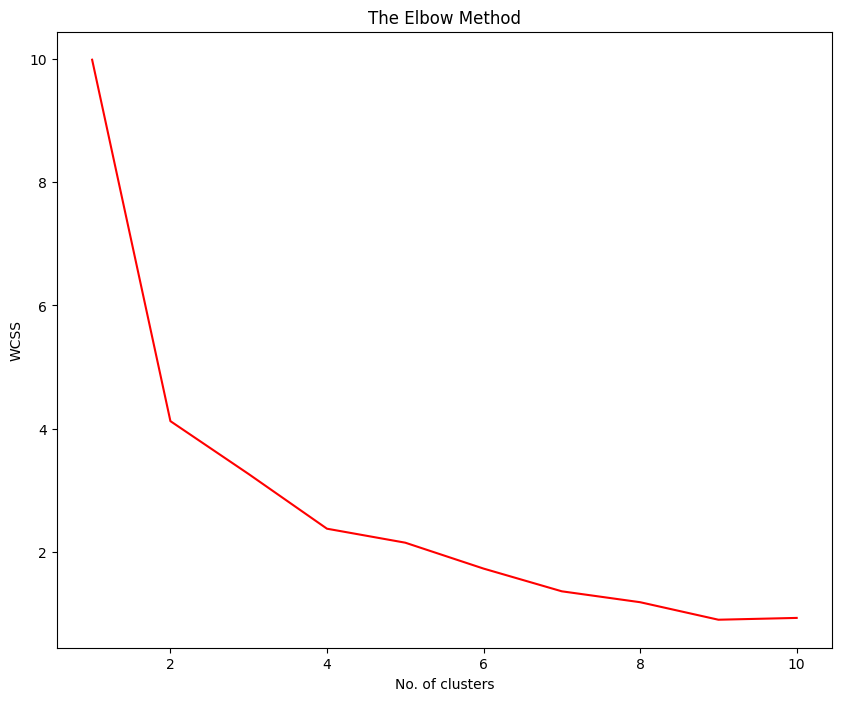

In [244]:
#for plotting the elbow curve we have return this code
fig=plt.figure(figsize=(10,8))
WCSS=[] #within clusters sum of square..
for i in range(1,11): #i takes values from 1 to 10
    clf = KMeans(n_clusters=i) #k means no.of clusters we are saying i takes values from 1
    clf.fit(df_norm) #now we are saying to fit these model to normalise data
    WCSS.append(clf.inertia_) #inertia another name for WCSS
plt.plot(range(1,11),WCSS,color='red')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [245]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [246]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([0, 3, 4, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 0], dtype=int32)

In [247]:
y_kmeans

array([0, 3, 4, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 0], dtype=int32)

In [248]:
#cluster centers..
clf.cluster_centers_

array([[0.85823171, 0.87673611, 0.09868421, 0.25657895, 0.45879882,
        0.91666667],
       [0.19560976, 0.22222222, 0.73157895, 0.66315789, 0.04287146,
        0.24666667],
       [0.63821138, 0.73148148, 0.30116959, 0.3625731 , 0.26883255,
        0.72962963],
       [0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667]])

In [250]:
clf.inertia_ #this says WCSS the when k=5

1.881023104747003

In [251]:
md=pd.Series(y_kmeans) #converting numpy array to pandas series object
Univ['Clust']=md #Creating a new column and asiigning it to new column
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [253]:
Univ.iloc[:,1:7].groupby(Univ['Clust']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Clust,,,,,,
0,1356.875000,91.125000,21.500000,10.875000,33878.750000,94.500000
1,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
2,1266.666667,80.666667,36.888889,12.888889,23455.111111,88.888889
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


In [254]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using Kmeans')

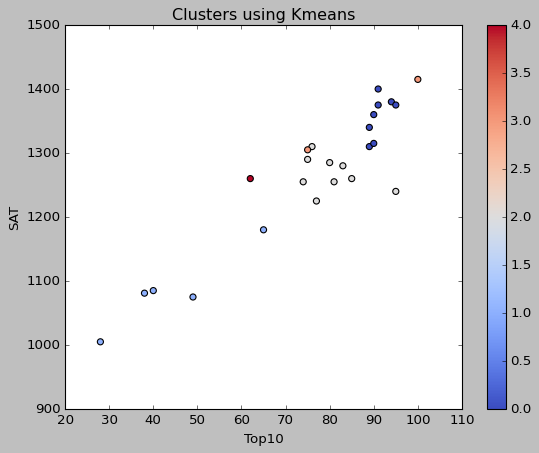

In [256]:
Univ.plot(x="Top10",y="SAT",c=clf.labels_,kind="scatter",s=30,cmap=plt.cm.coolwarm)
plt.title('Clusters using Kmeans')

In [257]:
#here clusters are not homogoneous some are heterogenous,what we do is change the k value to 6
#and so we have outliers see at caltech sat value,its more than others..
#so to handle such outliers we use another cluster model called DBSCAN